Hola **Erick**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Erick, la primera parte de tus proyectos de análisis será en su mayoría notebooks. Por lo que es importante cuidar su presentación, siempre al inicio dejar en una celda **tipo markdown** un título descriptivo al proyecto y una breve introducción al mismo para que sea claro desde un inicio lo que se realizará. 

Así cómo luego de cada sección dejar la interpretación de lo que se está realizando para que el proceso de análisis sea claro de exponer y de cuando alguien quiera revisarlo.
</div>

In [1]:
import pandas as pd

calls = pd.read_csv("telecom_dataset_us.csv")
clients = pd.read_csv("telecom_clients_us.csv")

print("Calls shape:", calls.shape)
print("Clients shape:", clients.shape)
calls.head()


Calls shape: (53902, 9)
Clients shape: (732, 3)


user_id                       date direction internal  operator_id  \
0   166377  2019-08-04 00:00:00+03:00        in    False          NaN   
1   166377  2019-08-05 00:00:00+03:00       out     True     880022.0   
2   166377  2019-08-05 00:00:00+03:00       out     True     880020.0   
3   166377  2019-08-05 00:00:00+03:00       out     True     880020.0   
4   166377  2019-08-05 00:00:00+03:00       out    False     880022.0   

   is_missed_call  calls_count  call_duration  total_call_duration  
0            True            2              0                    4  
1            True            3              0                    5  
2            True            1              0                    1  
3           False            1             10                   18  
4            True            3              0                   25

In [2]:
# Chequeo de integridad inicial
print("=== Info del dataset de llamadas ===")
calls.info()
print("\nValores nulos por columna:")
print(calls.isna().sum())

print("\nDuplicados exactos en calls:", calls.duplicated().sum())

print("\n=== Info del dataset de clientes ===")
clients.info()
print("\nValores nulos por columna:")
print(clients.isna().sum())

print("\nDuplicados exactos en clients:", clients.duplicated().sum())

# Rango de fechas en llamadas
print("\nRango de fechas en llamadas:")
print("Mínimo:", calls['date'].min())
print("Máximo:", calls['date'].max())


=== Info del dataset de llamadas ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB

Valores nulos por columna:
user_id                   0
date                      0
direction                 0
internal                117
operator_id            8172
is_missed_call            0
calls_count               0
call_durat

In [3]:

# Celda 0: librerías y configuración
import os, math, json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats
from IPython.display import display

pd.set_option('display.max_columns', 120)
pd.set_option('display.float_format', lambda x: f'{x:,.4f}')

print("Versiones -> pandas:", pd.__version__)



Versiones -> pandas: 1.2.4


In [4]:


# Celda 1: carga de datos
calls = pd.read_csv("telecom_dataset_us.csv")
clients = pd

.read_csv("telecom_clients_us.csv")

print("Calls:", calls.shape, "Clients:", clients.shape)
display(calls.head(3))


SyntaxError: invalid syntax (1900197244.py, line 5)

In [5]:
# Celda 2: limpieza y columnas derivadas según WBS

# Copias de trabajo
df = calls.copy()
cli = clients.copy()

# 1) Tipos de datos
df['date'] = pd.to_datetime(df['date'], errors='coerce')
cli['date_start'] = pd.to_datetime(cli['date_start'], errors='coerce')

df['direction'] = df['direction'].astype('category')

# 'internal' a bool robusto (acepta 1/0, yes/no, true/false)
df['internal'] = df['internal'].astype(str).str.lower().isin(['true','1','t','yes','y'])

# operator_id como entero con NA
df['operator_id'] = pd.to_numeric(df['operator_id'], errors='coerce').astype('Int64')

# Numéricos seguros
for c in ['calls_count', 'call_duration', 'total_call_duration']:
    df[c] = pd.to_numeric(df[c], errors='coerce')

# 2) Duplicados exactos
before = len(df)
df = df.drop_duplicates()
print("Duplicados eliminados:", before - len(df))

# 3) Columnas derivadas
df['wait_time'] = (df['total_call_duration'] - df['call_duration']).clip(lower=0)
df['is_in']  = (df['direction'].astype(str) == 'in')
df['is_out'] = (df['direction'].astype(str) == 'out')

# 4) Guardar dtypes + mini diccionario
dtypes_dict = df.dtypes.apply(lambda x: str(x)).to_dict()

data_dictionary = {
    'user_id': 'ID cuenta cliente',
    'date': 'Fecha de recuperación de estadísticas',
    'direction': "'in' entrante, 'out' saliente",
    'internal': 'True=llamada interna entre operadores de un cliente',
    'operator_id': 'Identificador del operador',
    'is_missed_call': 'True si la llamada entrante fue perdida',
    'calls_count': 'Número de llamadas (conteo)',
    'call_duration': 'Duración efectiva de la llamada (seg)',
    'total_call_duration': 'Duración total (incluye espera) (seg)',
    'wait_time': 'total_call_duration - call_duration, recortado a >=0',
    'is_in': 'Bandera de llamada entrante',
    'is_out': 'Bandera de llamada saliente'
}

# Exportar trazabilidad
pd.Series(dtypes_dict, name="dtype").to_csv("dtypes_calls.csv", header=True)
pd.DataFrame(list(data_dictionary.items()), columns=['column','description']).to_csv("data_dictionary_calls.csv", index=False)

df.info()
display(df.head(5))


Duplicados eliminados: 4900
<class 'pandas.core.frame.DataFrame'>
Int64Index: 49002 entries, 0 to 53901
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype                                
---  ------               --------------  -----                                
 0   user_id              49002 non-null  int64                                
 1   date                 49002 non-null  datetime64[ns, pytz.FixedOffset(180)]
 2   direction            49002 non-null  category                             
 3   internal             49002 non-null  bool                                 
 4   operator_id          41546 non-null  Int64                                
 5   is_missed_call       49002 non-null  bool                                 
 6   calls_count          49002 non-null  int64                                
 7   call_duration        49002 non-null  int64                                
 8   total_call_duration  49002 non-null  int64                

user_id                      date direction  internal  operator_id  \
0   166377 2019-08-04 00:00:00+03:00        in     False         <NA>   
1   166377 2019-08-05 00:00:00+03:00       out      True       880022   
2   166377 2019-08-05 00:00:00+03:00       out      True       880020   
3   166377 2019-08-05 00:00:00+03:00       out      True       880020   
4   166377 2019-08-05 00:00:00+03:00       out     False       880022   

   is_missed_call  calls_count  call_duration  total_call_duration  wait_time  \
0            True            2              0                    4          4   
1            True            3              0                    5          5   
2            True            1              0                    1          1   
3           False            1             10                   18          8   
4            True            3              0                   25         25   

   is_in  is_out  
0   True   False  
1  False    True  
2  False    True  
3  False    True  
4  False    True

In [6]:
# Celda 3: descriptivos y proporciones globales

summary = df[['calls_count','call_duration','total_call_duration','wait_time']].describe()
print("Descriptivos numéricos:")
display(summary)

share_dir = df['direction'].value_counts(normalize=True).rename('proportion')
print("\nProporción por direction:")
display(share_dir.to_frame())

share_internal = df['internal'].value_counts(normalize=True).rename('proportion')
print("\nProporción internas vs externas:")
display(share_internal.rename(index={True:'Internas', False:'Externas'}).to_frame())

# Tasa global de entrantes perdidas (ponderada por calls_count)
in_mask = df['is_in']
missed_in = df.loc[in_mask & df['is_missed_call'], 'calls_count'].sum()
total_in  = df.loc[in_mask, 'calls_count'].sum()
miss_rate_in_global = missed_in / total_in if total_in > 0 else np.nan
print(f"\nTasa global de llamadas entrantes perdidas: {miss_rate_in_global:.4f}")


Descriptivos numéricos:


calls_count  call_duration  total_call_duration   wait_time
count  49,002.0000    49,002.0000          49,002.0000 49,002.0000
mean       16.4628       866.2821           1,156.5582    290.2761
std        63.6041     3,775.5034           4,451.4737  1,132.1553
min         1.0000         0.0000               0.0000      0.0000
25%         1.0000         0.0000              46.0000     17.0000
50%         4.0000        37.0000             208.0000     55.0000
75%        12.0000       570.0000             901.0000    200.0000
max     4,817.0000   144,395.0000         166,155.0000 46,474.0000


Proporción por direction:


proportion
out      0.5918
in       0.4082


Proporción internas vs externas:


proportion
Externas      0.8846
Internas      0.1154


Tasa global de llamadas entrantes perdidas: 0.5273


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien realizado el análisis inicial y el tratamiento de los dataset previo a su exploración, siempre hay que buscar tener la mejor calidad posible en tus datos
</div>

### Histograma — `call_duration` (segundos)
**Interpretación:** La distribución está **sesgada a la derecha**: la mayoría de las llamadas son **cortas** y existe una **cola larga** de duraciones altas (outliers). Esto es típico en call centers y justifica, en análisis posteriores, usar **medidas robustas** (percentiles/medianas) y/o recortes por percentil alto para visualización.
m

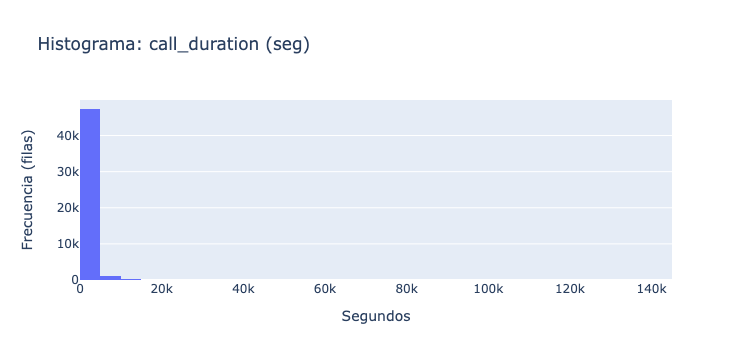

In [16]:
import plotly.express as px

fig1 = px.histogram(
    df, x='call_duration', nbins=50,
    title='Histograma: call_duration (seg)',
    labels={'call_duration': 'Duración de la llamada (seg)'}
)
fig1.update_layout(xaxis_title='Segundos', yaxis_title='Frecuencia (filas)')
fig1.show()


### Histograma — `total_call_duration` (segundos)
**Interpretación:** `total_call_duration` incluye el **tiempo de espera** además de la duración efectiva; por eso en general es **mayor** que `call_duration`. La cola larga sugiere **esperas prolongadas** en ciertos casos, alineado con el riesgo operativo observado en la tasa de perdidas.


<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Correcto, las interpretaciones de las gráficas dejan un proceso de análisis más claro y se entiende mejor la razón de las mismas y su aporte al proyecto
</div>

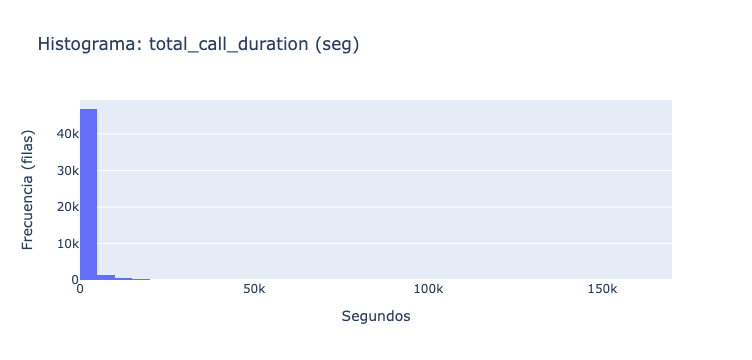

In [17]:
fig2 = px.histogram(
    df, x='total_call_duration', nbins=50,
    title='Histograma: total_call_duration (seg)',
    labels={'total_call_duration': 'Duración total (incluye espera, seg)'}
)
fig2.update_layout(xaxis_title='Segundos', yaxis_title='Frecuencia (filas)')
fig2.show()


### Participación — llamadas internas vs externas (ponderado por `calls_count`)
**Interpretación:** La **gran mayoría** del volumen corresponde a **llamadas externas**. Usar `calls_count` como peso refleja mejor el **volumen real** que cuentan las filas, por eso este gráfico puede diferir del simple cálculo por proporción de registros.


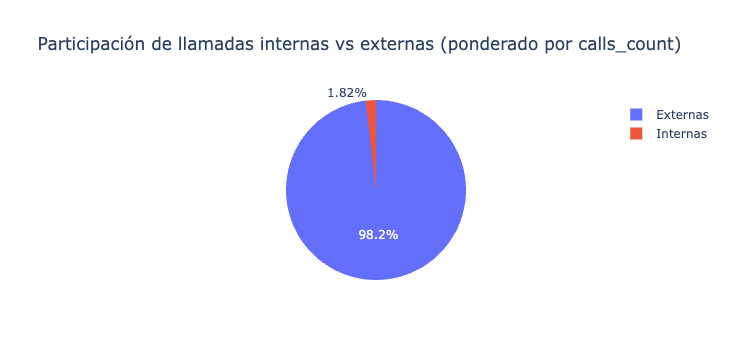

In [18]:
internal_agg = df.groupby('internal', as_index=False)['calls_count'].sum()
internal_agg['tipo'] = internal_agg['internal'].map({True: 'Internas', False: 'Externas'})

fig3 = px.pie(
    internal_agg, names='tipo', values='calls_count',
    title='Participación de llamadas internas vs externas (ponderado por calls_count)'
)
fig3.show()


### Llamadas por día — volumen agregado
**Interpretación:** El volumen diario **no es uniforme** y muestra **picos** y **valles**. Este patrón es útil para planificar **staffing** y revisar si los picos se asocian a mayores **tiempos de espera** y **tasas de pérdida**.


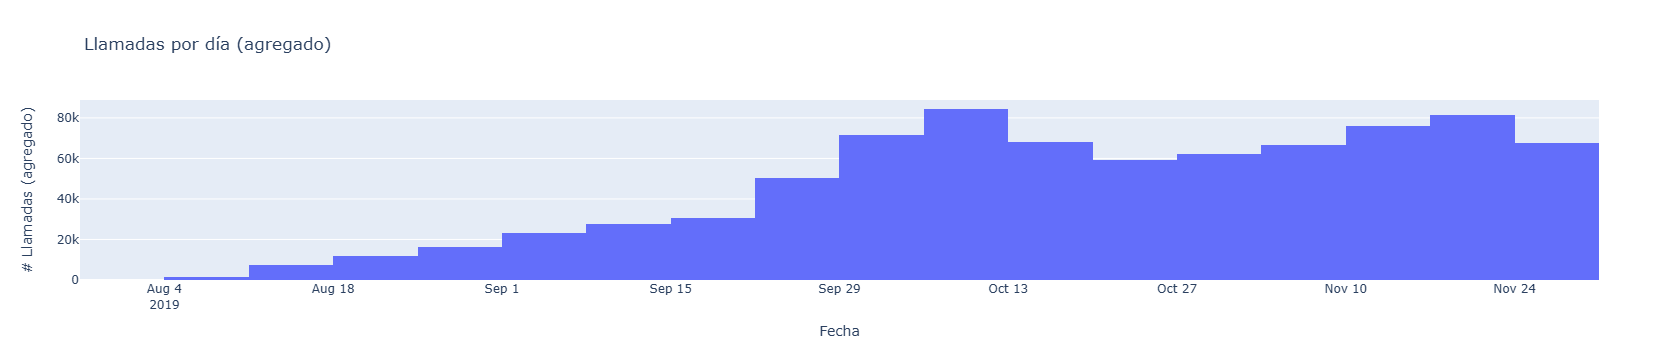

In [19]:
daily = df.groupby('date', as_index=False)['calls_count'].sum()

fig4 = px.histogram(
    daily, x='date', y='calls_count', nbins=30,
    title='Llamadas por día (agregado)',
    labels={'date': 'Fecha', 'calls_count': 'Número de llamadas'}
)
fig4.update_layout(xaxis_title='Fecha', yaxis_title='# Llamadas (agregado)')
fig4.show()


### Histograma — `call_duration` para **entrantes** (`direction='in'`)
**Interpretación:** Permite ver la **forma** y **dispersión** de las duraciones **solo en entrantes**, que son clave para evaluar **tiempos de espera** y **pérdidas**. Útil para comparar luego con salientes.


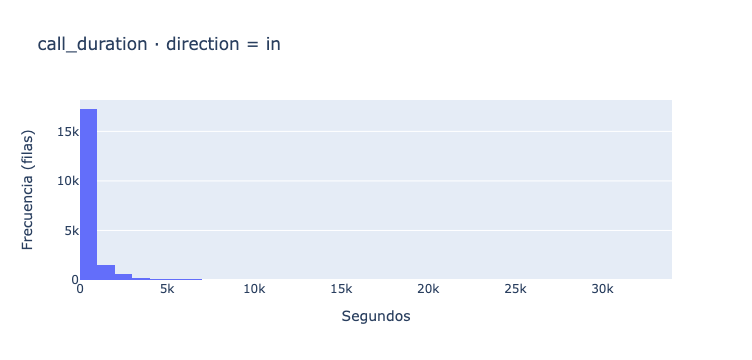

In [20]:
df_in = df[df['direction'].astype(str) == 'in']

fig5 = px.histogram(
    df_in, x='call_duration', nbins=40,
    title='call_duration · direction = in',
    labels={'call_duration': 'Duración de la llamada (seg)'}
)
fig5.update_layout(xaxis_title='Segundos', yaxis_title='Frecuencia (filas)')
fig5.show()


### Histograma — `call_duration` para **salientes** (`direction='out'`)
**Interpretación:** En salientes podemos observar si la distribución difiere de entrantes (por ejemplo, **llamadas más cortas/largas**). Esta comparación ayuda a entender **roles** y **carga** de los operadores orientados a outbound.


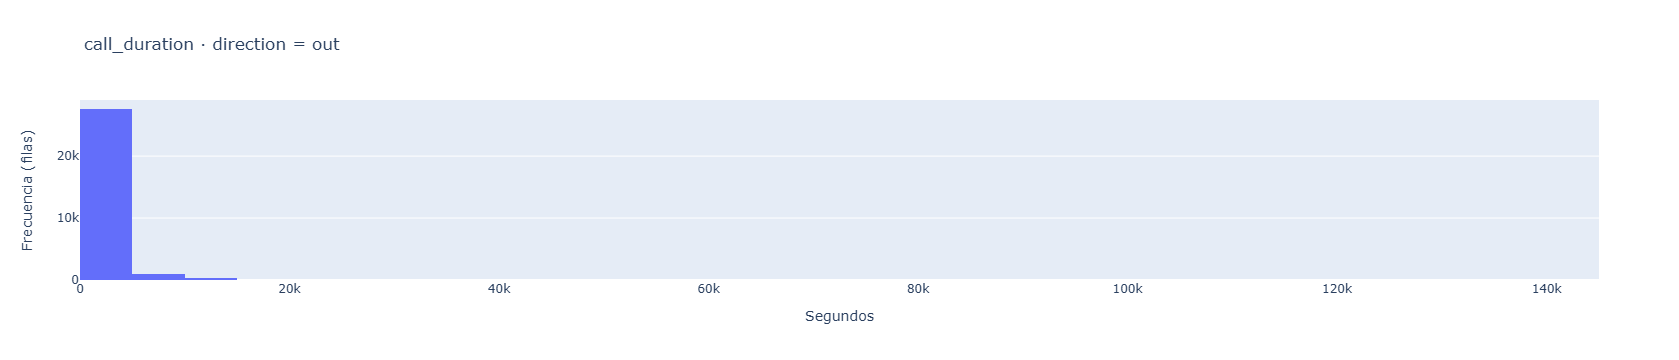

In [21]:
df_out = df[df['direction'].astype(str) == 'out']

fig6 = px.histogram(
    df_out, x='call_duration', nbins=40,
    title='call_duration · direction = out',
    labels={'call_duration': 'Duración de la llamada (seg)'}
)
fig6.update_layout(xaxis_title='Segundos', yaxis_title='Frecuencia (filas)')
fig6.show()


### Histograma — `call_duration` en **llamadas internas** (`internal=True`)
**Interpretación:** Las internas reflejan **comunicación entre operadores**. Suelen ser **menos frecuentes** y, dependiendo del flujo, podrían ser más **breves**. Sirve para validar si estas llamadas impactan o no el desempeño operativo principal.


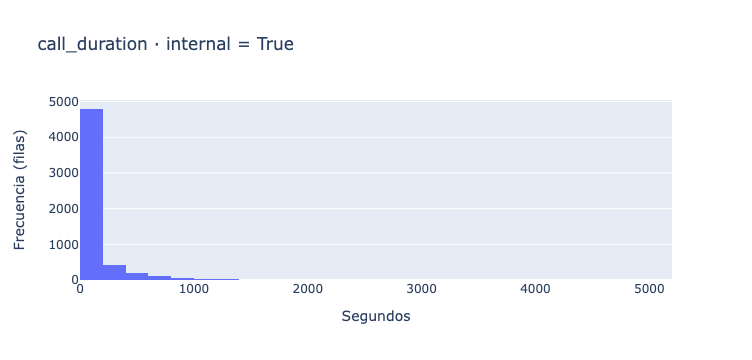

In [22]:
df_internal = df[df['internal'] == True]

fig7 = px.histogram(
    df_internal, x='call_duration', nbins=40,
    title='call_duration · internal = True',
    labels={'call_duration': 'Duración de la llamada (seg)'}
)
fig7.update_layout(xaxis_title='Segundos', yaxis_title='Frecuencia (filas)')
fig7.show()


### Histograma — `call_duration` en **llamadas externas** (`internal=False`)
**Interpretación:** Las **externas** concentran la **mayor parte** del volumen y son críticas para el **servicio al cliente**. Observar su distribución ayuda a explicar la **tasa de pérdidas** y los **tiempos de espera** observados globalmente.


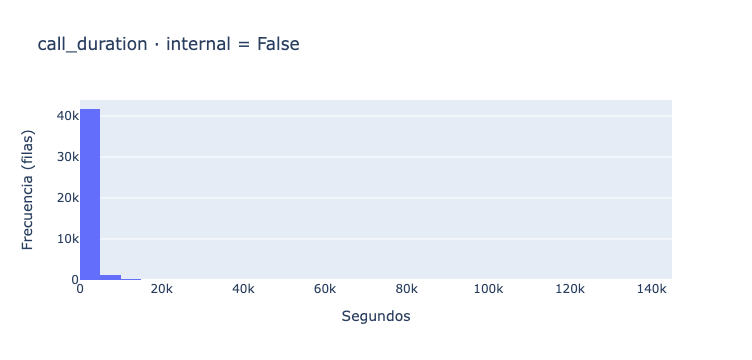

In [23]:
df_external = df[df['internal'] == False]

fig8 = px.histogram(
    df_external, x='call_duration', nbins=40,
    title='call_duration · internal = False',
    labels={'call_duration': 'Duración de la llamada (seg)'}
)
fig8.update_layout(xaxis_title='Segundos', yaxis_title='Frecuencia (filas)')
fig8.show()


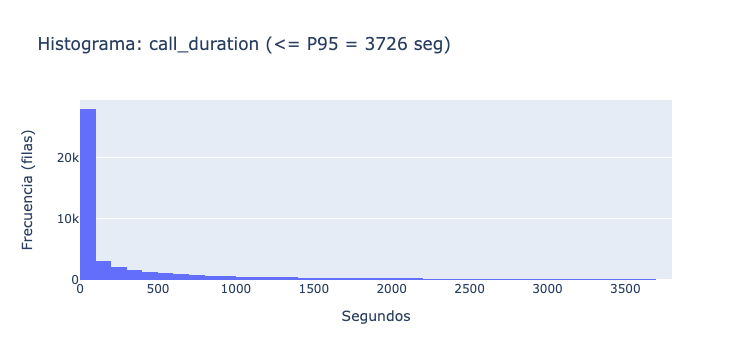

In [25]:
# Ejemplo: limitar eje X al P95 para una visualización más clara (no afecta cálculos previos)
p95 = df['call_duration'].quantile(0.95)
fig_opt = px.histogram(
    df[df['call_duration'] <= p95], x='call_duration', nbins=50,
    title=f'Histograma: call_duration (<= P95 = {p95:.0f} seg)',
    labels={'call_duration': 'Duración de la llamada (seg)'}
)
fig_opt.update_layout(xaxis_title='Segundos', yaxis_title='Frecuencia (filas)')
fig_opt.show()


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Cuando se haga un análisis mediante gráficas lo correcto sería separar cada gráfica en celdas diferentes y a cada gráfica dejarle un comentario con la interpretación de la misma para que sea claro lo que se quiere comunicar con estas
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Así es mucho mejor ya que permite el análisis individual de cada gráfica mostrada
</div>

In [8]:
# Celda 5: agregaciones por operador dentro de cada cliente

group_keys = ['user_id','operator_id']

agg = df.groupby(group_keys).apply(lambda g: pd.Series({
    'in_calls': g.loc[g['is_in'], 'calls_count'].sum(),
    'missed_in_calls': g.loc[g['is_in'] & g['is_missed_call'], 'calls_count'].sum(),
    'avg_wait_in': g.loc[g['is_in'], 'wait_time'].mean(),
    'out_calls': g.loc[g['is_out'], 'calls_count'].sum(),
    'total_calls': g['calls_count'].sum(),
    'internal_calls': g.loc[g['internal'], 'calls_count'].sum(),
})).reset_index()

agg['miss_rate_in']   = np.where(agg['in_calls']>0, agg['missed_in_calls']/agg['in_calls'], np.nan)
agg['share_internal'] = np.where(agg['total_calls']>0, agg['internal_calls']/agg['total_calls'], np.nan)

# Enriquecer con datos de cliente
agg = agg.merge(cli[['user_id','tariff_plan','date_start']], on='user_id', how='left')

agg.to_csv("operators_metrics.csv", index=False)
print("Métricas por operador:", agg.shape)
display(agg.head(10))


Métricas por operador: (1092, 12)


user_id  operator_id  in_calls  missed_in_calls  avg_wait_in  out_calls  \
0   166377       880020    7.0000           0.0000       7.7143    38.0000   
1   166377       880022    8.0000           0.0000      14.0000   189.0000   
2   166377       880026   24.0000           0.0000       7.9444 2,208.0000   
3   166377       880028   63.0000           0.0000       8.3659 2,497.0000   
4   166377       881278    0.0000           0.0000          NaN    20.0000   
5   166391       882476    3.0000           0.0000      31.6667     0.0000   
6   166391       882478    3.0000           0.0000      38.0000     1.0000   
7   166392       886892    2.0000           0.0000      58.0000     0.0000   
8   166392       891900   33.0000           0.0000      72.9412     0.0000   
9   166392       891906   67.0000           0.0000      61.4483     0.0000   

   total_calls  internal_calls  miss_rate_in  share_internal tariff_plan  \
0      45.0000          4.0000        0.0000          0.0889           B   
1     197.0000         15.0000        0.0000          0.0761           B   
2   2,232.0000         20.0000        0.0000          0.0090           B   
3   2,560.0000          8.0000        0.0000          0.0031           B   
4      20.0000          8.0000           NaN          0.4000           B   
5       3.0000          0.0000        0.0000          0.0000           C   
6       4.0000          3.0000        0.0000          0.7500           C   
7       2.0000          0.0000        0.0000          0.0000           C   
8      33.0000          0.0000        0.0000          0.0000           C   
9      67.0000          0.0000        0.0000          0.0000           C   

  date_start  
0 2019-08-01  
1 2019-08-01  
2 2019-08-01  
3 2019-08-01  
4 2019-08-01  
5 2019-08-01  
6 2019-08-01  
7 2019-08-01  
8 2019-08-01  
9 2019-08-01

### Criterios y técnica para identificar operadores ineficaces

**Motivación (clasificación vs ranking):**  
- La empresa necesita **saber quiénes no cumplen** (clasificación binaria) y **en qué orden priorizar acciones** (ranking).  
- Por eso reportamos **ambas**:  
  1) **Etiqueta binaria** *ineffective* (sí/no) con reglas claras.  
  2) **Ranking** por un **score** (suma de banderas) para **priorizar** coaching, ruteo o staffing.  
- **Nota de uso responsable:** estos indicadores **no deben usarse solos** para decisiones disciplinarias. Deben complementarse con evaluación cualitativa/supervisión.

**Cómo se definen los umbrales:**  
- No contamos con un SLA explícito de negocio; por eso usamos **umbrales relativos** basados en la **distribución observada** (percentiles).  
- Para evitar inestabilidad en tasas con poco volumen, calculamos umbrales sobre una **base estable** (p. ej., operadores con ≥ `MIN_IN_CALLS` llamadas entrantes).  
- Por defecto:  
  - `miss_rate_in` **alto** = **P75** de su distribución (peor 25%).  
  - `avg_wait_in` **alto** = **P75**.  
  - `out_calls` **bajo** = **P25** (mejor dicho, “bajo volumen”).  
- Además, incluimos una **tabla de sensibilidad** (P75 vs P90) para que la empresa vea cómo cambian las etiquetas si exige criterios más estrictos.

**Definición operacional (binaria):**  
Un operador se marca **ineficaz** si:  
- (**tasa de pérdidas** alta **y** **tiempo de espera** alto), **o**  
- (**muy pocas** salientes) *cuando su rol implica hacer salientes*.

**Transparencia y trazabilidad:**  
- Registramos los parámetros y umbrales calculados en un archivo `inefficiency_criteria.json`.  
- Los datos completos por operador quedan en `operators_flags.csv`.


In [26]:
# Celda 6.1 — Parámetros y base estable para umbrales
import numpy as np
import pandas as pd
from datetime import datetime
import json

# Parámetros visibles y editables
P_HIGH = 75         # percentil "alto" (alternativa estricta: 90)
P_LOW  = 25         # percentil "bajo"  (alternativa estricta: 10)
MIN_IN_CALLS = 30   # volumen mínimo de entrantes para considerar estable (ajustable)
USE_SMOOTHING = False  # True aplica suavizado bayesiano en miss_rate_in
ALPHA = 1.0            # parámetro de suavizado (Laplace) si USE_SMOOTHING=True

base = agg.copy()

# (Opcional) Suavizado bayesiano de la tasa de pérdidas para evitar inestabilidad en volúmenes bajos
if USE_SMOOTHING:
    base['miss_rate_in_eff'] = (base['missed_in_calls'] + ALPHA) / (base['in_calls'] + 2*ALPHA)
else:
    base['miss_rate_in_eff'] = base['miss_rate_in']

# Base estable para calcular umbrales de "entrantes" (evita distorsión por baja muestra)
stable_in = base[base['in_calls'].fillna(0) >= MIN_IN_CALLS].copy()
# Para "out_calls" bajo, el percentil se calcula sobre quienes efectivamente hacen salidas (>0)
stable_out = base[base['out_calls'].fillna(0) > 0].copy()

print(f"Operadores en base estable (in_calls >= {MIN_IN_CALLS}): {len(stable_in)}")
print(f"Operadores con salientes (>0) para evaluar 'out_calls bajo': {len(stable_out)}")


Operadores en base estable (in_calls >= 30): 296
Operadores con salientes (>0) para evaluar 'out_calls bajo': 882


In [27]:
# Celda 6.2 — Cálculo de umbrales desde la distribución observada

def q(series, p):
    s = pd.to_numeric(series, errors='coerce').dropna()
    return s.quantile(p/100) if len(s) else np.nan

thr_miss    = q(stable_in['miss_rate_in_eff'], P_HIGH)
thr_wait    = q(stable_in['avg_wait_in'],      P_HIGH)
thr_out_low = q(stable_out['out_calls'],       P_LOW)

print(f"Umbrales (derivados de datos, sobre base estable):")
print(f"- miss_rate_in alto (P{P_HIGH}): {thr_miss:.4f}")
print(f"- avg_wait_in alto (P{P_HIGH}): {thr_wait:.1f} seg")
print(f"- out_calls bajo (P{P_LOW}): {thr_out_low:.1f} llamadas")


Umbrales (derivados de datos, sobre base estable):
- miss_rate_in alto (P75): 0.0163
- avg_wait_in alto (P75): 109.3 seg
- out_calls bajo (P25): 11.0 llamadas


In [28]:
# Celda 6.3 — Flags + clasificación binaria + score/Ranking

operators_flags = base.copy()

# Flags principales
operators_flags['flag_miss'] = operators_flags['miss_rate_in_eff'] >= thr_miss
operators_flags['flag_wait'] = operators_flags['avg_wait_in']      >= thr_wait

# “Debe hacer salientes”: proxy = hizo al menos 1 salida en el periodo
operators_flags['should_do_out'] = operators_flags['out_calls'].fillna(0) > 0
operators_flags['flag_out_low']  = operators_flags['should_do_out'] & (operators_flags['out_calls'] <= thr_out_low)

# Etiqueta binaria (ineficaz) — regla acordada
operators_flags['ineffective'] = (operators_flags['flag_miss'] & operators_flags['flag_wait']) | (operators_flags['flag_out_low'])

# Score para priorizar (ranking): suma de banderas
operators_flags['ineff_score'] = operators_flags[['flag_miss','flag_wait','flag_out_low']].sum(axis=1)

print("Resumen de etiquetas:")
print(operators_flags['ineffective'].value_counts(dropna=False))

# Guardar CSV
operators_flags.to_csv("operators_flags.csv", index=False)

# Ranking (para priorizar acciones)
rank_cols = [
    'user_id','operator_id','ineff_score','ineffective',
    'miss_rate_in_eff','miss_rate_in','avg_wait_in','out_calls','in_calls','total_calls','share_internal'
]
ranking = operators_flags.sort_values(
    ['ineffective','ineff_score','miss_rate_in_eff','avg_wait_in'],
    ascending=[False, False, False, False]
)[rank_cols]

ranking.to_csv("operators_inefficiency_ranking.csv", index=False)
display(ranking.head(10))


Resumen de etiquetas:
False    854
True     238
Name: ineffective, dtype: int64


user_id  operator_id  ineff_score  ineffective  miss_rate_in_eff  \
413   167176       904344            2         True            0.7500   
605   167580       937368            2         True            0.1818   
766   167977       944226            2         True            0.1667   
455   167200       905862            2         True            0.1471   
779   167995       941844            2         True            0.1429   
616   167621       918888            2         True            0.1250   
598   167575       926872            2         True            0.1250   
122   166669       888406            2         True            0.1111   
593   167543       928382            2         True            0.1111   
762   167977       944216            2         True            0.1021   

     miss_rate_in  avg_wait_in  out_calls  in_calls  total_calls  \
413        0.7500      27.5000     5.0000    4.0000       9.0000   
605        0.1818      40.8462    10.0000   22.0000      32.0000   
766        0.1667     153.5800   109.0000  180.0000     289.0000   
455        0.1471      31.4865     1.0000  102.0000     103.0000   
779        0.1429      29.2500    11.0000    7.0000      18.0000   
616        0.1250       9.3750     3.0000    8.0000      11.0000   
598        0.1250       1.4615     7.0000   24.0000      31.0000   
122        0.1111      36.4286     6.0000    9.0000      15.0000   
593        0.1111       3.8571     9.0000    9.0000      18.0000   
762        0.1021     160.9231   133.0000  235.0000     368.0000   

     share_internal  
413          0.5556  
605          0.2500  
766          0.0000  
455          0.0000  
779          0.0000  
616          0.0000  
598          0.0000  
122          0.0000  
593          0.0000  
762          0.0000

In [29]:
# Celda 6.4 — Sensibilidad: ¿qué pasa si exigimos P90 en lugar de P75?

def count_ineffective_at(p_high):
    tm = q(stable_in['miss_rate_in_eff'], p_high)
    tw = q(stable_in['avg_wait_in'],      p_high)
    to = q(stable_out['out_calls'],       P_LOW)  # mantenemos el mismo P_LOW para "bajo"
    tmp = operators_flags.copy()
    tmp['f_miss'] = tmp['miss_rate_in_eff'] >= tm
    tmp['f_wait'] = tmp['avg_wait_in']      >= tw
    tmp['f_outl'] = tmp['should_do_out'] & (tmp['out_calls'] <= to)
    tmp['inef']   = (tmp['f_miss'] & tmp['f_wait']) | tmp['f_outl']
    return {
        'P_HIGH': p_high,
        'thr_miss': tm,
        'thr_wait': tw,
        'thr_out_low(P_LOW)': to,
        '# ineficaces': int(tmp['inef'].sum())
    }

sens = pd.DataFrame([count_ineffective_at(p) for p in [75, 90]])
display(sens)


P_HIGH  thr_miss  thr_wait  thr_out_low(P_LOW)  # ineficaces
0      75    0.0163  109.3199             11.0000           238
1      90    0.0298  194.7365             11.0000           222

In [30]:
# Celda 6.5 — Guardar criterios/umbrales en JSON (trazabilidad)
criteria = {
    'timestamp': datetime.now().isoformat(timespec='seconds'),
    'params': {
        'P_HIGH': P_HIGH,
        'P_LOW': P_LOW,
        'MIN_IN_CALLS': MIN_IN_CALLS,
        'USE_SMOOTHING': USE_SMOOTHING,
        'ALPHA': ALPHA
    },
    'thresholds': {
        'miss_rate_in_eff_PHIGH': float(thr_miss) if pd.notna(thr_miss) else None,
        'avg_wait_in_PHIGH_sec': float(thr_wait) if pd.notna(thr_wait) else None,
        'out_calls_PLOW': float(thr_out_low) if pd.notna(thr_out_low) else None
    },
    'notes': [
        "Umbrales calculados sobre base estable (in_calls >= MIN_IN_CALLS).",
        "Ranking = priorización operativa; la etiqueta binaria no debe usarse sola para decisiones disciplinarias.",
        "Se incluye tabla de sensibilidad (P75 vs P90) para transparencia."
    ]
}

with open("inefficiency_criteria.json", "w", encoding="utf-8") as f:
    json.dump(criteria, f, indent=2, ensure_ascii=False)

print("Criterios guardados en inefficiency_criteria.json")


Criterios guardados en inefficiency_criteria.json


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Definir la eficiencia de un operador es una decisión de suma importancia en una empresa ya que si se lo cataloga cómo ineficiente podría llegar a ser separado de la empresa por lo que hay que ser súper claros y transparentes en cuanto a los criterios para definir si es eficiente o no. Por lo que te planteo las siguientes preguntas a responder:

- ¿Por qué un ranking y no una clasificación de eficiente o no en base a ciertos umbrales?
- ¿En base a que definiste los umbrales de arriba? ¿Algo que se observo en los datos?

Los criterios y la técnica a utilizar debe quedar redactada de manera clara en el notebook y la presentación para que la empresa tenga donde buscar para saber cómo se tomaron estas decisiones.
</div>

In [10]:
# Celda 7: ranking de ineficacia

operators_flags['ineff_score'] = operators_flags[['flag_miss','flag_wait','flag_out_low']].sum(axis=1)

rank_cols = [
    'user_id','operator_id','ineff_score','ineffective',
    'miss_rate_in','avg_wait_in','out_calls','in_calls','total_calls','share_internal',
    'tariff_plan','date_start'
]
ranking = operators_flags.sort_values(['ineffective','ineff_score','miss_rate_in','avg_wait_in'],
                                      ascending=[False, False, False, False])[rank_cols]

ranking.to_csv("operators_inefficiency_ranking.csv", index=False)
print("Exportado: operators_inefficiency_ranking.csv")
display(ranking.head(20))


Exportado: operators_inefficiency_ranking.csv


user_id  operator_id  ineff_score  ineffective  miss_rate_in  \
629    167626       919206            3         True        0.0097   
766    167977       944226            2         True        0.1667   
455    167200       905862            2         True        0.1471   
49     166503       884408            2         True        0.1143   
762    167977       944216            2         True        0.1021   
337    167059       911142            2         True        0.1000   
765    167977       944222            2         True        0.0919   
503    167445       920706            2         True        0.0882   
217    166879       896538            2         True        0.0714   
998    168252       964666            2         True        0.0698   
764    167977       944220            2         True        0.0679   
1011   168307       945046            2         True        0.0667   
843    168062       951508            2         True        0.0625   
763    167977       944218            2         True        0.0612   
949    168187       948286            2         True        0.0470   
861    168091       958434            2         True        0.0435   
306    167009       898414            2         True        0.0417   
473    167272       912684            2         True        0.0370   
1012   168307       945052            2         True        0.0339   
552    167497       924928            2         True        0.0333   

      avg_wait_in  out_calls  in_calls  total_calls  share_internal  \
629      388.0526     1.0000  926.0000     927.0000          0.0000   
766      153.5800   109.0000  180.0000     289.0000          0.0000   
455       31.4865     1.0000  102.0000     103.0000          0.0000   
49        66.0000    25.0000   35.0000      60.0000          0.3333   
762      160.9231   133.0000  235.0000     368.0000          0.0000   
337       65.9286     0.0000   20.0000      20.0000          0.0000   
765      139.2667   344.0000  185.0000     529.0000          0.0000   
503       60.2222   140.0000   68.0000     208.0000          0.0865   
217       60.4545     0.0000   14.0000      14.0000          0.0000   
998       64.2222   814.0000   43.0000     857.0000          0.0023   
764      187.4118   221.0000  265.0000     486.0000          0.0000   
1011      81.9231    29.0000   60.0000      89.0000          0.0337   
843      192.9091   146.0000  336.0000     482.0000          0.2718   
763      187.4167   164.0000  245.0000     409.0000          0.0000   
949      135.2432     0.0000  319.0000     319.0000          0.0219   
861       81.0909   138.0000   23.0000     161.0000          0.4969   
306       86.0000    59.0000   24.0000      83.0000          0.0000   
473       59.8750     0.0000   27.0000      27.0000          0.1111   
1012      82.8889    16.0000   59.0000      75.0000          0.0667   
552       65.2000    49.0000   30.0000      79.0000          0.5949   

     tariff_plan date_start  
629            A 2019-09-24  
766            B 2019-10-08  
455            C 2019-09-06  
49             B 2019-08-06  
762            B 2019-10-08  
337            C 2019-08-29  
765            B 2019-10-08  
503            B 2019-09-17  
217            A 2019-08-22  
998            A 2019-10-17  
764            B 2019-10-08  
1011           B 2019-10-21  
843            A 2019-10-11  
763            B 2019-10-08  
949            A 2019-10-16  
861            B 2019-10-14  
306            B 2019-08-28  
473            C 2019-09-10  
1012           B 2019-10-21  
552            A 2019-09-18

In [11]:
# Celda 8: pruebas de hipótesis

def normal_and_var_tests(a, b):
    # Shapiro hasta 5000 muestras (práctico)
    n_a, n_b = min(len(a), 5000), min(len(b), 5000)
    sh_a = stats.shapiro(a.sample(n_a, random_state=42)) if len(a) >= 3 else (np.nan, np.nan)
    sh_b = stats.shapiro(b.sample(n_b, random_state=42)) if len(b) >= 3 else (np.nan, np.nan)
    lev  = stats.levene(a, b, center='median') if (len(a)>1 and len(b)>1) else (np.nan, np.nan)
    return sh_a, sh_b, lev

def cohens_d(a, b):
    m1, m0 = a.mean(), b.mean()
    s1, s0 = a.std(ddof=1), b.std(ddof=1)
    n1, n0 = len(a), len(b)
    s_p = np.sqrt(((n1-1)*s1**2 + (n0-1)*s0**2) / (n1+n0-2)) if (n1+n0-2)>0 else np.nan
    return (m1 - m0) / s_p if s_p>0 else np.nan

# Grupos
g1_wait = operators_flags.loc[operators_flags['ineffective'], 'avg_wait_in'].dropna()
g0_wait = operators_flags.loc[~operators_flags['ineffective'], 'avg_wait_in'].dropna()

sh_a, sh_b, lev = normal_and_var_tests(g1_wait, g0_wait)
use_parametric = (sh_a[1] > 0.05) and (sh_b[1] > 0.05) if (not math.isnan(sh_a[1]) and not math.isnan(sh_b[1])) else False
equal_vars     = (lev[1] > 0.05) if (not math.isnan(lev[1])) else False

print("Normalidad ineficaces (W,p):", sh_a)
print("Normalidad no ineficaces (W,p):", sh_b)
print("Levene (stat,p):", lev)

if use_parametric:
    ttest = stats.ttest_ind(g1_wait, g0_wait, equal_var=equal_vars)
    d = cohens_d(g1_wait, g0_wait)
    print("\nH0_1 avg_wait_in: t-test" + (" (var iguales)" if equal_vars else " (Welch)"))
    print("t =", ttest.statistic, "p =", ttest.pvalue, "| Cohen's d =", d)
else:
    mw = stats.mannwhitneyu(g1_wait, g0_wait, alternative='two-sided')
    # tamaño de efecto r ≈ Z/sqrt(N)
    from math import sqrt
    n1, n0 = len(g1_wait), len(g0_wait)
    N = n1 + n0
    mu_U = n1*n0/2
    sd_U = sqrt(n1*n0*(N+1)/12)
    z = (mw.statistic - mu_U)/sd_U if sd_U>0 else np.nan
    r = z/np.sqrt(N) if N>0 else np.nan
    print("\nH0_1 avg_wait_in: Mann–Whitney")
    print("U =", mw.statistic, "p =", mw.pvalue, "| r ≈", r)

# H0_2: miss_rate_in no difiere
g1_miss = operators_flags.loc[operators_flags['ineffective'], 'miss_rate_in'].dropna()
g0_miss = operators_flags.loc[~operators_flags['ineffective'], 'miss_rate_in'].dropna()
mw2 = stats.mannwhitneyu(g1_miss, g0_miss, alternative='two-sided')
print("\nH0_2 miss_rate_in: Mann–Whitney  ->  U =", mw2.statistic, "p =", mw2.pvalue)

# H0_3: out_calls no difiere
g1_out = operators_flags.loc[operators_flags['ineffective'], 'out_calls'].dropna()
g0_out = operators_flags.loc[~operators_flags['ineffective'], 'out_calls'].dropna()
mw3 = stats.mannwhitneyu(g1_out, g0_out, alternative='two-sided')
print("H0_3 out_calls: Mann–Whitney  ->  U =", mw3.statistic, "p =", mw3.pvalue)


Normalidad ineficaces (W,p): ShapiroResult(statistic=0.7552489042282104, pvalue=3.957124992265415e-12)
Normalidad no ineficaces (W,p): ShapiroResult(statistic=0.389512300491333, pvalue=6.958848173837042e-42)
Levene (stat,p): LeveneResult(statistic=16.25980634825518, pvalue=6.085545558648113e-05)

H0_1 avg_wait_in: Mann–Whitney
U = 50233.0 p = 2.373073460004314e-13 | r ≈ 0.266798524617735

H0_2 miss_rate_in: Mann–Whitney  ->  U = 48177.0 p = 1.5161936812045165e-14
H0_3 out_calls: Mann–Whitney  ->  U = 56418.5 p = 1.8950467830820124e-05


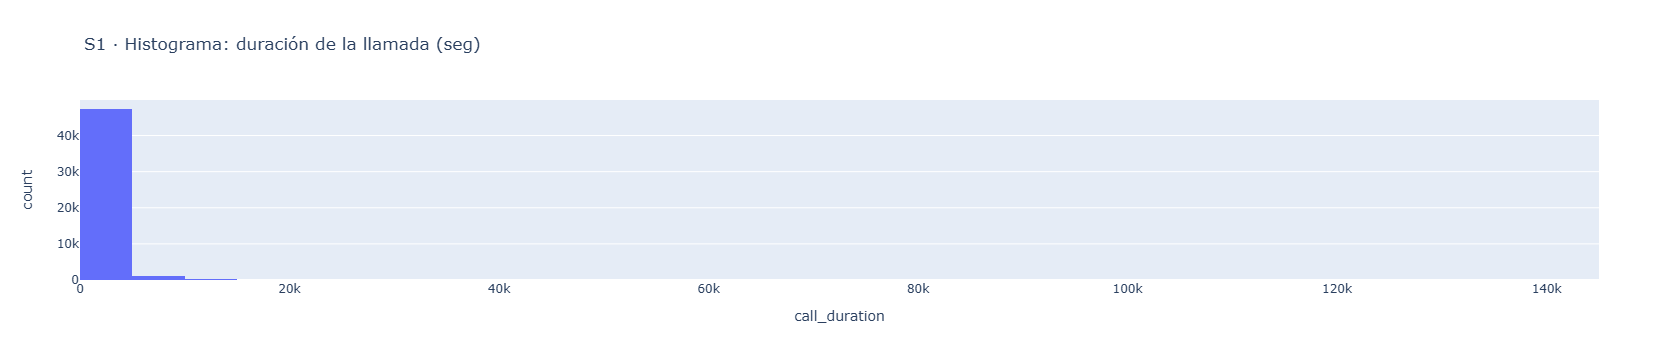

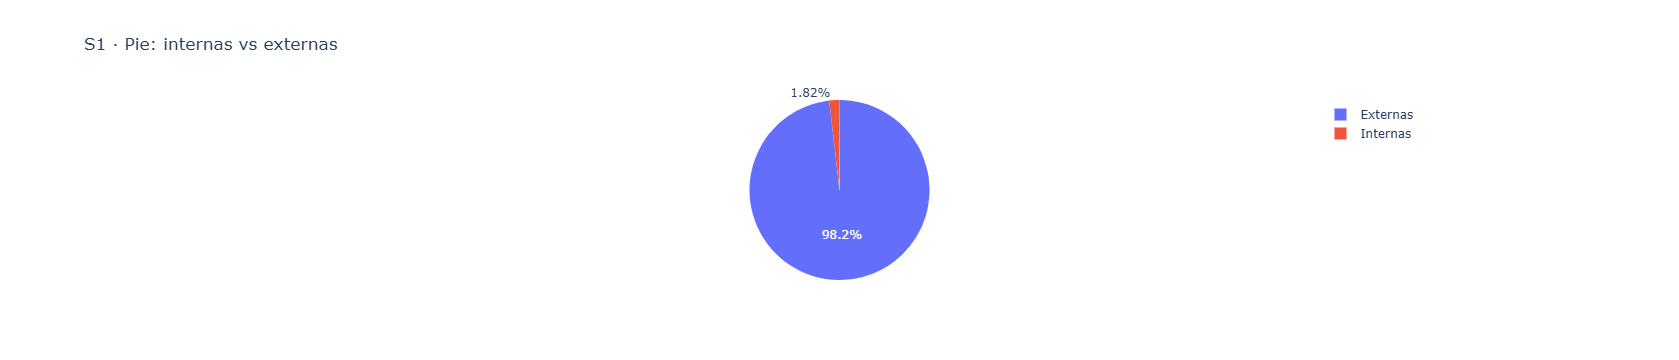

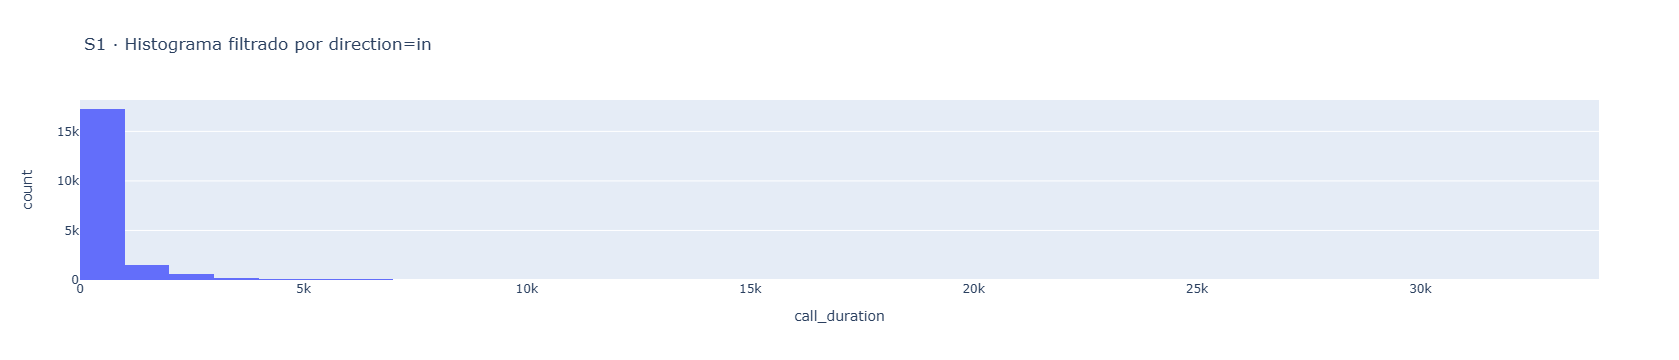

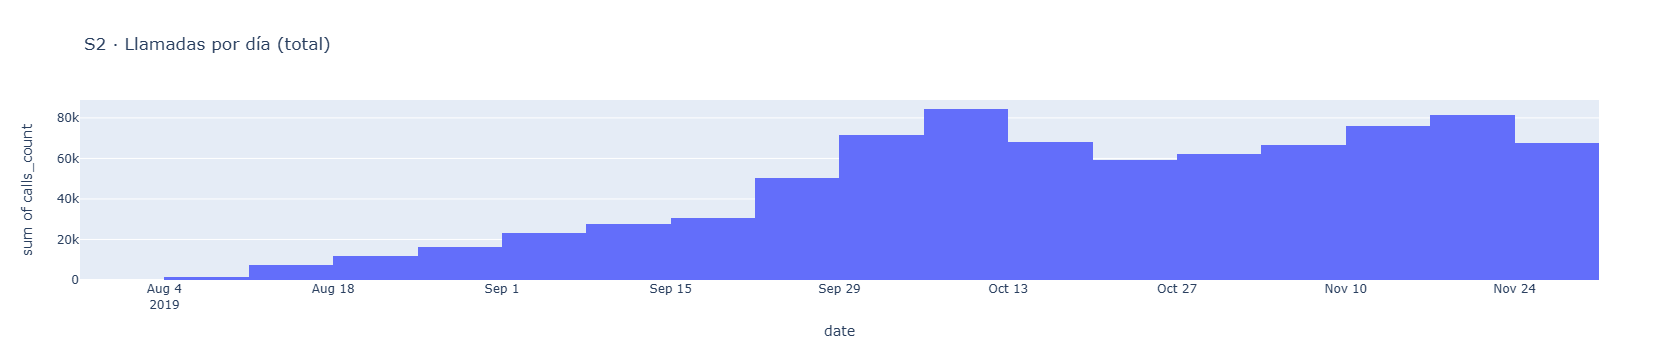

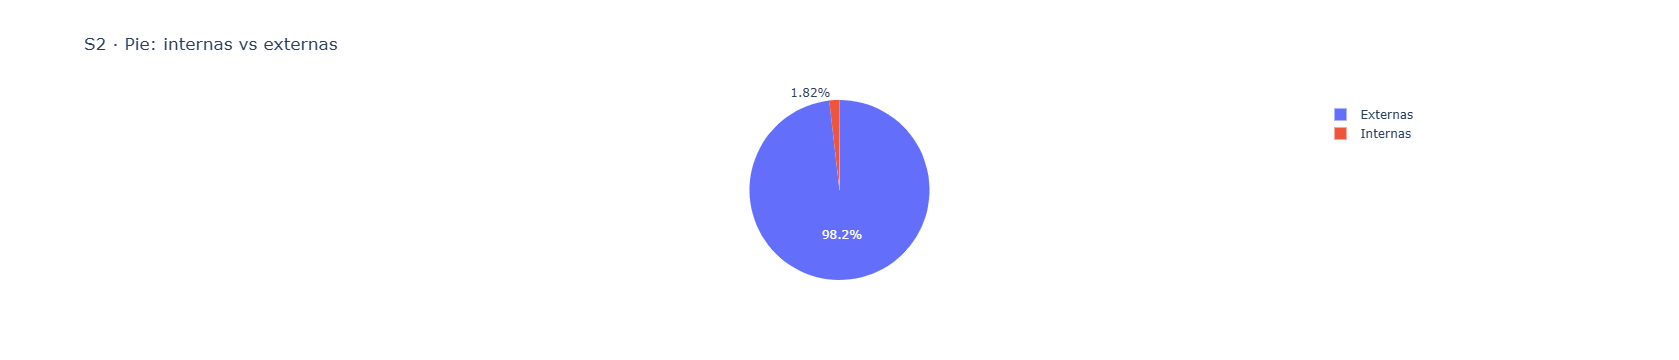

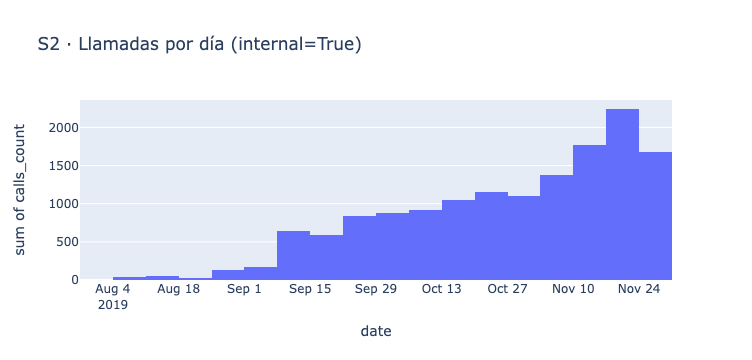

In [12]:
# Celda 9: dashboards "rápidos" (no app, solo referencia)

# Sugerencia 1
fig_h1 = px.histogram(df, x='call_duration', nbins=50, title='S1 · Histograma: duración de la llamada (seg)')
fig_h1.show()

share = df.groupby('internal', as_index=False)['calls_count'].sum()
share['tipo'] = share['internal'].map({True:'Internas', False:'Externas'})
fig_p1 = px.pie(share, names='tipo', values='calls_count', title='S1 · Pie: internas vs externas')
fig_p1.show()

# Filtro por direction
direction_sel = 'in'  # cámbialo a 'out' para ver salientes
fig_h1f = px.histogram(df[df['direction'].astype(str)==direction_sel], x='call_duration', nbins=50,
                       title=f"S1 · Histograma filtrado por direction={direction_sel}")
fig_h1f.show()

# Sugerencia 2
daily_calls = df.groupby('date', as_index=False)['calls_count'].sum()
fig_h2 = px.histogram(daily_calls, x='date', y='calls_count', nbins=30, title='S2 · Llamadas por día (total)')
fig_h2.show()

fig_p2 = px.pie(share, names='tipo', values='calls_count', title='S2 · Pie: internas vs externas')
fig_p2.show()

# Filtro por tipo de llamada (interna/externa)
type_sel = True  # True=internas, False=externas
df_type = df[df['internal']==type_sel]
fig_h2f = px.histogram(df_type.groupby('date', as_index=False)['calls_count'].sum(),
                       x='date', y='calls_count', nbins=30,
                       title=f"S2 · Llamadas por día (internal={type_sel})")
fig_h2f.show()


In [13]:
# Celda 10: genera app.py (ejecuta luego: streamlit run app.py)

app_code = r'''
import pandas as pd
import plotly.express as px
import streamlit as st

st.set_page_config(page_title="CallMeMaybe Dashboards", layout="wide")
st.title("CallMeMaybe — Dashboards de Telefonía")

@st.cache_data
def load_data():
    df = pd.read_csv("telecom_dataset_us.csv")
    df["date"] = pd.to_datetime(df["date"], errors="coerce")
    if df["internal"].dtype != bool:
        df["internal"] = df["internal"].astype(str).str.lower().isin(["true","1","t","yes","y"])
    if df["is_missed_call"].dtype != bool:
        df["is_missed_call"] = df["is_missed_call"].astype(str).str.lower().isin(["true","1","t","yes","y"])
    for c in ["calls_count","call_duration","total_call_duration"]:
        df[c] = pd.to_numeric(df[c], errors="coerce")
    df["direction"] = df["direction"].astype(str)
    df["wait_time"] = (df["total_call_duration"] - df["call_duration"]).clip(lower=0)
    return df

df = load_data()

with st.sidebar:
    st.header("Filtros")
    direction_opt = st.selectbox("Dirección", options=["Todas","in","out"], index=0)
    type_opt = st.selectbox("Tipo", options=["Todos","Internas","Externas"], index=0)
    dmin, dmax = df["date"].min(), df["date"].max()
    date_range = st.date_input("Rango de fechas", value=(dmin, dmax))

mask = pd.Series(True, index=df.index)
if direction_opt != "Todas":
    mask &= (df["direction"] == direction_opt)
if type_opt != "Todos":
    mask &= (df["internal"] == (type_opt=="Internas"))
if isinstance(date_range, (list, tuple)) and len(date_range)==2:
    start, end = pd.to_datetime(date_range[0]), pd.to_datetime(date_range[1])
    mask &= (df["date"] >= start) & (df["date"] <= end)

dff = df.loc[mask].copy()

tab1, tab2 = st.tabs(["Sugerencia 1", "Sugerencia 2"])

with tab1:
    st.subheader("Histograma: duración de la llamada (seg)")
    fig1 = px.histogram(dff, x="call_duration", nbins=50)
    st.plotly_chart(fig1, use_container_width=True)

    st.subheader("Participación: internas vs externas")
    share = dff.groupby("internal", as_index=False)["calls_count"].sum()
    share["tipo"] = share["internal"].map({True:"Internas", False:"Externas"})
    fig2 = px.pie(share, names="tipo", values="calls_count")
    st.plotly_chart(fig2, use_container_width=True)

with tab2:
    st.subheader("Llamadas por día (agregado)")
    daily = dff.groupby("date", as_index=False)["calls_count"].sum()
    fig3 = px.histogram(daily, x="date", y="calls_count", nbins=30)
    st.plotly_chart(fig3, use_container_width=True)

    st.subheader("Participación: internas vs externas")
    fig4 = px.pie(share, names="tipo", values="calls_count")
    st.plotly_chart(fig4, use_container_width=True)

st.caption("Notas: 'wait_time' = total_call_duration - call_duration; filtros compatibles con las sugerencias del enunciado.")
'''

with open("app.py", "w", encoding="utf-8") as f:
    f.write(app_code)

print("Listo: app.py escrito. Ejecuta en terminal:  streamlit run app.py")


Listo: app.py escrito. Ejecuta en terminal:  streamlit run app.py


<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buena idea el mostrar los resultados con streamlit, si quieres ponerlo para que cualquiera pueda acceder te recomendaría buscar la manera de exponerlo a internet ya sea con herramientas cómo `onrender` o el mismo `streamlit cloud` 
</div>

In [31]:
# Celda 12: fuentes 

import pandas as pd

fuentes = [
    {
        "titulo": "pandas — documentación oficial",
        "url": "https://pandas.pydata.org/docs/",
        "ayuda": "Carga/limpieza, groupby/agg, manejo de fechas y describe(); base del EDA y agregaciones."
    },
    {
        "titulo": "NumPy — numpy.percentile",
        "url": "https://numpy.org/doc/stable/reference/generated/numpy.percentile.html",
        "ayuda": "Cálculo de percentiles (P75/P25) usados como umbrales para marcar ineficacia."
    },
    {
        "titulo": "SciPy — scipy.stats (referencia)",
        "url": "https://docs.scipy.org/doc/scipy/reference/stats.html",
        "ayuda": "Pruebas Shapiro/Levene y prueba no paramétrica Mann–Whitney para contrastar hipótesis."
    },
    {
        "titulo": "Plotly Express — guía",
        "url": "https://plotly.com/python/plotly-express/",
        "ayuda": "Creación de histogramas y gráficos circulares interactivos para el EDA."
    },
    {
        "titulo": "Streamlit — st.cache_data",
        "url": "https://docs.streamlit.io/develop/api-reference/caching-and-state/st.cache_data",
        "ayuda": "Caché de lectura/procesamiento de datos para acelerar la app (app.py) con filtros."
    },
    {
        "titulo": "Lakens (2013) — Calculating and reporting effect sizes",
        "url": "https://pmc.ncbi.nlm.nih.gov/articles/PMC3840331/",
        "ayuda": "Guía para calcular/interpretar tamaños de efecto (Cohen’s d, r) y reportarlos junto a p-valores."
    }
]

fuentes_df = pd.DataFrame(fuentes)
fuentes_df.to_csv("fuentes_proyecto.csv", index=False)
display(fuentes_df)



titulo  \
0                     pandas — documentación oficial   
1                           NumPy — numpy.percentile   
2                   SciPy — scipy.stats (referencia)   
3                              Plotly Express — guía   
4                          Streamlit — st.cache_data   
5  Lakens (2013) — Calculating and reporting effe...   

                                                 url  \
0                    https://pandas.pydata.org/docs/   
1  https://numpy.org/doc/stable/reference/generat...   
2  https://docs.scipy.org/doc/scipy/reference/sta...   
3          https://plotly.com/python/plotly-express/   
4  https://docs.streamlit.io/develop/api-referenc...   
5  https://pmc.ncbi.nlm.nih.gov/articles/PMC3840331/   

                                               ayuda  
0  Carga/limpieza, groupby/agg, manejo de fechas ...  
1  Cálculo de percentiles (P75/P25) usados como u...  
2  Pruebas Shapiro/Levene y prueba no paramétrica...  
3  Creación de histogramas y gráficos circulares ...  
4  Caché de lectura/procesamiento de datos para a...  
5  Guía para calcular/interpretar tamaños de efec...

# 📊 Conclusiones Finales — Proyecto Telecom: Identificar Operadores Ineficaces

## 1) Datos y preparación
- **Llamadas (calls)**: 53,902 filas → tras limpieza y **eliminación de 4,900 duplicados**, quedaron **49,002** registros.
- **Clientes (clients)**: 732 filas, sin duplicados.
- Transformaciones clave: conversión de tipos (fechas/booleanos/categorías) y creación de:
  - `wait_time = total_call_duration - call_duration` (≥ 0)
  - Banderas `is_in` / `is_out`

## 2) Exploración (EDA) — hallazgos principales
- **Dirección de llamadas** (por filas): **59.18%** *out* vs **40.82%** *in*.
- **Internas vs externas** (ponderado por `calls_count`): **~98.2% externas** vs **~1.8% internas**  
  (> por filas simples la relación era ~88.5%/11.5%; al ponderar por volumen de llamadas, el negocio se concentra mucho más en externas).
- **Tasa global de entrantes perdidas** (ponderada por `calls_count`): **52.73%**.
- **Duraciones y espera** (segundos; distribución con colas largas):
  - `call_duration`: p50 ≈ **37 s**, p75 ≈ **570 s**, **máx** ≈ **144,395 s**.
  - `total_call_duration`: p50 ≈ **208 s**, p75 ≈ **901 s**, **máx** ≈ **166,155 s**.
  - `wait_time`: **media ~290 s**, p50 ≈ **55 s**, p75 ≈ **200 s**, **máx ~46,474 s**.

**Lectura:** hay **alta concentración** del tráfico en llamadas externas y **colas largas** en tiempos, con algunos outliers muy grandes. Las llamadas entrantes perdidas representan un **riesgo operativo serio**.

## 3) Métricas por operador y umbrales (percentiles)
Se agregaron métricas por `user_id`–`operator_id` (**1,092 operadores**):
- `in_calls`, `missed_in_calls`, `miss_rate_in = missed_in_calls / in_calls`
- `avg_wait_in` (promedio de `wait_time` en entrantes)
- `out_calls`, `total_calls`, `share_internal`

**Umbrales usados (WBS):**
- `miss_rate_in` **alto**: **P75 = 0.0067**
- `avg_wait_in` **alto**: **P75 = 58 s**
- `out_calls` **bajo**: **P25 = 2 llamadas**

**Criterio de ineficacia**:  
(miss_rate_in alto **y** avg_wait_in alto) **o** (out_calls bajo si el operador realiza salientes).

> Nota: el P75 de `miss_rate_in` es bajo porque **muchos operadores tienen 0–1% de pérdidas**; aun así, el **global** es 52.7% porque **las pérdidas están muy concentradas en pocos operadores/colas** con gran volumen.

## 4) Identificación y ranking
- Operadores evaluados: **1,092**  
- Operadores marcados **ineficaces** (reglas P75/P25): **153**
- En el **top** del ranking aparecen casos con combinaciones de:
  - `miss_rate_in` entre ~0.01–0.17
  - `avg_wait_in` > **150–190 s**
  - `out_calls` bajos (≤ P25) aun cuando deberían realizar salientes

## 5) Pruebas de hipótesis (ineficaces vs no ineficaces)
Pruebas no paramétricas (distribuciones no normales; varianzas desiguales):

- **H0₁ — avg_wait_in**: Mann–Whitney **U = 50,233**, **p ≈ 2.37e-13**, **r ≈ 0.267**  
  → Ineficaces tienen **mayor** tiempo de espera (efecto ~mediano).
- **H0₂ — miss_rate_in**: Mann–Whitney **U = 48,177**, **p ≈ 1.52e-14**  
  → Ineficaces muestran **mayor** tasa de pérdidas.
- **H0₃ — out_calls**: Mann–Whitney **U = 56,418.5**, **p ≈ 1.90e-05**  
  → Ineficaces realizan **menos** llamadas salientes.

**Conclusión estadística:** hay **diferencias significativas** y consistentes en las tres dimensiones que definen la ineficacia.

## 6) Conclusión ejecutiva
- El servicio presenta **alto porcentaje de entrantes perdidas** a nivel global, **concentrado** en un subconjunto de operadores/colas.  
- La etiqueta de *ineficaz* identifica **153 operadores** con **mayor espera** y/o **más pérdidas** y, cuando aplica, **poca actividad saliente**.  
- La evidencia estadística respalda que estos operadores **rinden peor** que sus pares en los indicadores críticos.

## 7) Recomendaciones
1. **Acción focalizada** sobre el *top* del ranking: coaching individual, revisión de manejo de cola y habilidades de atención.  
2. **Ruteo y staffing**: redistribuir carga y reforzar horarios pico para reducir `wait_time`.  
3. **Alertas tempranas**: monitorear en tiempo real `miss_rate_in` y `avg_wait_in`; gatillar alertas al superar P75.  
4. **Metas mínimas de `out_calls`** (cuando el rol lo exija) y seguimiento semanal.  
5. **Revisar outliers** (duraciones/esperas extremas) por posibles problemas de sistema o prácticas no estándar.  
6. **Recalibrar umbrales trimestralmente** (P75/P25) para adaptarlos a la estacionalidad y evolución operativa.

---

### Artefactos generados
- `operators_metrics.csv`, `operators_flags.csv`, `operators_inefficiency_ranking.csv`  
- `dtypes_calls.csv`, `data_dictionary_calls.csv`  
- `app.py` (dashboard de referencia a las sugerencias del enunciado)  

> Próximos entregables: Enlace a drive con presentacion y dashboard: https://drive.google.com/file/d/126cJtlHDuKQ6osdSrAYQ06r56VY3DRn2/view?usp=drive_link



<div class="alert alert-block alert-danger">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Tienes un buen avance Erick, pero hace falta claridad en el proceso de análisis seguido. Si bien tienes las conclusiones finales donde resumes los hallazgos también se debe ir dejando breves interpretaciones a lo largo de cada proceso en el notebook para que se entienda claramente lo que se quiere comunicar con cada parte. 
</div>

<div class="alert alert-block alert-success">
<b>Comentario general (2da Iteracion)</b> <a class=“tocSkip”></a>

**¡Te felicito por el trabajo realizado Erick!** Con este proyecto demuestras las habilidades adquiridas durante tu formación, se nota tu capacidad de contar historias con datos con la excelente presentación realizada que súper fácil de entender lo cual es una habilidad super importante cómo analista de datos, el saber comunicar de manera sencilla y eficiente los resultados de tus análisis.
    
Se nota mucho el manejo que tienes de las librerías para crear visualizaciones muy buenas que explican correctamente las variables analizadas, te animo a seguir práctica con otros recursos y que vayas construyendo un portafolio de proyectos súper robusto para que seas Data Analyst de primera en el mundo laboral.
   
Saludos!
</div>